In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def train_test_split(data, test_ratio):
    np.random.seed(int(len(data)/2))
    np.random.shuffle(data)
    data_size = len(data)

    if data_size == 0:
        raise ValueError("데이터 없음!")

    test_size = int(data_size * test_ratio)
    a = int(test_size/2)
    data[:, 0:-1] = (data[:, 0:-1] - data[:, 0:-1].mean()) / data[:, 0:-1].std()

    train = data[:-test_size]
    cv = data[-test_size: -a]
    test = data[-a:]

    X_train = train[:, 0:-1]
    X_train = np.concatenate((np.ones([X_train.shape[0],1]), X_train), axis=1)
    y_train = train[:, [-1]]

    X_cv = cv[:, 0:-1]
    X_cv = np.concatenate((np.ones([X_cv.shape[0],1]), X_cv), axis=1)
    y_cv = cv[:, [-1]]

    X_test = test[:, 0:-1]
    X_test = np.concatenate((np.ones([X_test.shape[0], 1]), X_test), axis=1)
    y_test = test[:, [-1]]

    print('Train : {}, Cross-Validation : {}, Test : {}'.format(len(train), len(cv), len(test)))
    return X_train, y_train, X_cv, y_cv, X_test, y_test

def hypothesis(X, theta):
    return X @theta.T

def cost_fn(X, y, theta):
    c = np.power(((X @ theta.T) - y), 2)
    cost = np.sum(c) / (2*len(X))
    return cost

def gradientDescent(X, y, theta, alpha, epochs):
    cost_list = np.zeros(epochs)

    for i in range(epochs):
        theta = theta - (alpha / len(X)) * np.sum(X * (X@theta.T - y), axis=0)
        cost_list[i] = cost_fn(X, y, theta)
    return theta, cost_list

def learning_curve(X, y, X_cv, y_cv, theta):
    train_error = np.zeros(len(X))
    cv_error = np.zeros(len(X_cv))

    for i in range(len(X)):
        error = cost_fn(X[:i+1],y[:i+1],theta)
        train_error[i] = error
    for i in range(len(X_cv)):
        error = cost_fn(X_cv[:i+1], y_cv[:i+1], theta)
        cv_error[i] = error

    return train_error, cv_error

Train : 120, Cross-Validation : 40, Test : 40


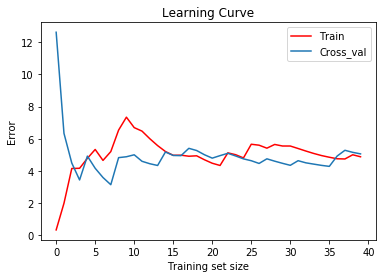

In [2]:
dataframe = pd.read_csv('./Data/Advertising.csv', index_col=0)
dataset = dataframe.values

X_train, y_train, X_cv, y_cv, X_test, y_test = train_test_split(dataset, test_ratio=0.4)
theta = np.zeros([1, len(X_train[0])])

learning_rate = 0.01
epochs = 1000

t_theta, t_cost_list = gradientDescent(X_train, y_train, theta, learning_rate, epochs)

t_error, cv_error = learning_curve(X_train, y_train, X_cv, y_cv, t_theta)
plt.plot(np.arange(len(X_cv)), t_error[0:len(X_cv)], 'r', label='Train')
plt.plot(np.arange(len(X_cv)), cv_error, label='Cross_val')
plt.xlabel('Training set size')
plt.ylabel('Error')
plt.title('Learning Curve')
plt.legend(loc='upper right')
plt.show()

In [3]:
def compareTheta(X, y, alpha, epochs):
    t1_list = np.zeros(epochs)
    t2_list = np.zeros(epochs)
    t3_list = np.zeros(epochs)

    X_1 = X[:, 0:2]
    theta = np.zeros([1, len(X_1[0])])
    for i in range(epochs):
        theta = theta - (alpha / len(X_1)) * np.sum(X_1 * (X_1 @ theta.T - y), axis=0)
        t1_list[i] = cost_fn(X_1, y, theta)

    X_2 = X[:, 0:3]
    theta = np.zeros([1, len(X_2[0])])
    for i in range(epochs):
        theta = theta - (alpha / len(X_2)) * np.sum(X_2 * (X_2 @ theta.T - y), axis=0)
        t2_list[i] = cost_fn(X_2, y, theta)

    theta = np.zeros([1, len(X[0])])
    for i in range(epochs):
        theta = theta - (alpha / len(X)) * np.sum(X * (X @ theta.T - y), axis=0)
        t3_list[i] = cost_fn(X, y, theta)

    return theta, t1_list, t2_list, t3_list

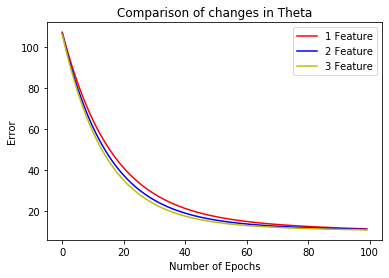

In [4]:
epochs = 100
theta, t1_list, t2_list, t3_list = compareTheta(X_train, y_train, learning_rate, epochs)
plt.plot(np.arange(epochs), t1_list, 'r', label='1 Feature')
plt.plot(np.arange(epochs), t2_list, 'b', label='2 Feature')
plt.plot(np.arange(epochs), t3_list, 'y', label='3 Feature')
plt.xlabel('Number of Epochs')
plt.ylabel('Error')
plt.title('Comparison of changes in Theta')
plt.legend(loc = 'upper right')
plt.show()